# Slonczewski STT Extension

Example 2 taken from the Mumax3 Website (https://mumax.github.io/examples.html)                    
Flipping the magnetization of a elliptical nanodisk with Slonczewski STT.                          

Implemented by Jed Cheng (jed.cheng@mag.ed.kyushu-u.ac.jp)

## Run Demo:

In [2]:
from magnumnp import *
import torch
import numpy as np

Timer.enable()
                                                                                                     
# initialize state
n = (64, 32, 1)
dx = (2.5e-9, 2.5e-9, 5e-9)
L = (n[0]*dx[0], n[1]*dx[1], n[2]*dx[2])
origin = (-L[0]/2., -L[1]/2., -L[2]/2.)
mesh = Mesh(n, dx, origin = origin)

state = State(mesh)
state.material = { 
    "Ms": 8e5,
    "A": 1.3e-11,
    "alpha": 0.01,
    "P": 0.5669,
    "Lambda": 1,
    "epsilon_prime": 0,
    "mp": state.Tensor((np.cos(np.radians(20)), np.sin(np.radians(20)), 0)),
    "d": L[2],
    "J": -8e11,
    }   

x, y, z = state.SpatialCoordinate()
disk = (x/80e-9)**2 + (y/40e-9)**2 < 1 
write_vti(disk, "data2/domain.vti")

state.m = state.Constant([0,0,0])
state.m[disk] = state.Tensor([1,0,0])

# initialize field terms
demag    = DemagField()
exchange = ExchangeField()
torque   = SpinTorqueSlonczewski()

# perform integration with spin torque
m_disk = lambda state: state.m[disk] # only consider disk region
llg = LLGSolver([demag, exchange, torque])
logger = Logger("data2", ['t', 'm', m_disk], ["m"], fields_every = 10) 
while state.t < 1e-9:
    llg.step(state, 5e-12)
    logger << state

Timer.print_report()

/home/florian/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
2024-02-13 13:23:32  magnum.np:INFO [State] running on device: cpu (dtype = float64)
2024-02-13 13:23:32  magnum.np:INFO [Mesh] 64x32x1 (size= 2.5e-09 x 2.5e-09 x 5e-09)
2024-02-13 13:23:32  magnum.np:INFO [LLGSolver] using RKF45 solver (atol = 1e-05)
2024-02-13 13:23:33  magnum.np:INFO [DEMAG]: Time calculation of demag kernel = 0.31194543838500977 s
2024-02-13 13:23:33  magnum.np:INFO [LLG] step: dt= 5e-12  t=5e-12
2024-02-13 13:23:33  magnum.np:IN

2024-02-13 13:23:55  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.45e-10
2024-02-13 13:23:55  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.5e-10
2024-02-13 13:23:55  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.55e-10
2024-02-13 13:23:56  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.6e-10
2024-02-13 13:23:56  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.65e-10
2024-02-13 13:23:56  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.7e-10
2024-02-13 13:23:56  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.75e-10
2024-02-13 13:23:57  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.8e-10
2024-02-13 13:23:57  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.85e-10
2024-02-13 13:23:57  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.9e-10
2024-02-13 13:23:57  magnum.np:INFO [LLG] step: dt= 5e-12  t=4.95e-10
2024-02-13 13:23:57  magnum.np:INFO [LLG] step: dt= 5e-12  t=5e-10
2024-02-13 13:23:58  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.05e-10
2024-02-13 13:23:58  magnum.np:INFO [LLG] step: dt= 5e-12  t=5.1e-10
2024-02-13 13:23:58  magnum.n

2024-02-13 13:24:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.4e-10
2024-02-13 13:24:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.45e-10
2024-02-13 13:24:19  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.5e-10
2024-02-13 13:24:20  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.55e-10
2024-02-13 13:24:20  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.6e-10
2024-02-13 13:24:20  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.65e-10
2024-02-13 13:24:21  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.7e-10
2024-02-13 13:24:21  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.75e-10
2024-02-13 13:24:21  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.8e-10
2024-02-13 13:24:21  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.85e-10
2024-02-13 13:24:21  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.9e-10
2024-02-13 13:24:22  magnum.np:INFO [LLG] step: dt= 5e-12  t=9.95e-10
2024-02-13 13:24:22  magnum.np:INFO [LLG] step: dt= 5e-12  t=1e-09
2024-02-13 13:24:22  magnum.np:INFO [LLG] step: dt= 5e-12  t=1.005e-09



TIMER REPORT
Operation                      No of calls    Avg time [ms]    Total time [s]
---------------------------  -------------  ---------------  ----------------
LLGSolver.step                         201       247.441            49.7356
    DemagField.h                     16926         1.12904          19.1101
    ExchangeField.h                  16926         0.627931         10.6284
    SpinTorqueSlonczewski.h          16926         0.541416          9.16401
---------------------------  -------------  ---------------  ----------------
Total                                                               49.9817
Missing                                                              0.246104



## Plot Results:

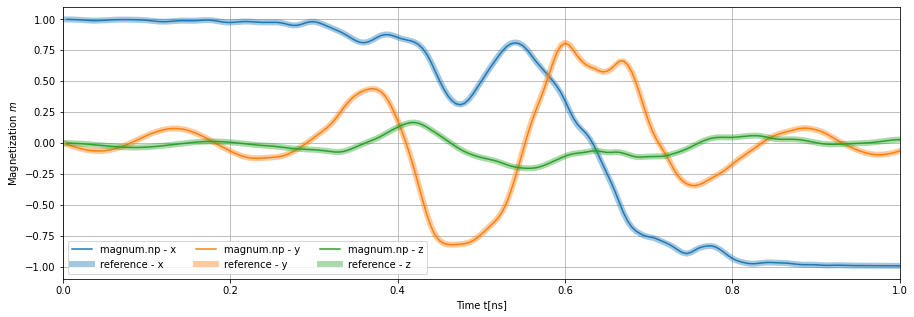

In [6]:
import numpy as np
import matplotlib.pyplot as plt
    
data = np.loadtxt("data2/log.dat")
ref = np.load("ref/M_mx3_2.npy")
#ref = np.load("ref/M_oommf_1.npy") # OOMMF and mumax3 perfectly agree

fig, ax = plt.subplots(figsize=(15, 5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,0]*1e9, data[:,4], '-', color = cycle[0], label = "magnum.np - x")
ax.plot(ref[0]*1e9, ref[1], '-', color = cycle[0], linewidth = 6, alpha = 0.4, label = "reference - x")

ax.plot(data[:,0]*1e9, data[:,5], '-', color = cycle[1], label = "magnum.np - y")
ax.plot(ref[0]*1e9, ref[2], '-', color = cycle[1], linewidth = 6, alpha = 0.4, label = "reference - y")

ax.plot(data[:,0]*1e9, data[:,6], '-', color = cycle[2], label = "magnum.np - z")
ax.plot(ref[0]*1e9, ref[3], '-', color = cycle[2], linewidth = 6, alpha = 0.4, label = "reference - z")
    
ax.set_xlim(0,1)
ax.set_xlabel("Time t[ns]")
ax.set_ylabel("Magnetization $m$")
ax.legend(ncol=3)
ax.grid()
fig.savefig("data2/results.png")